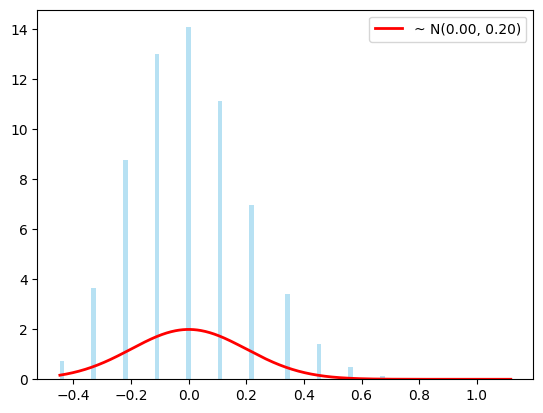

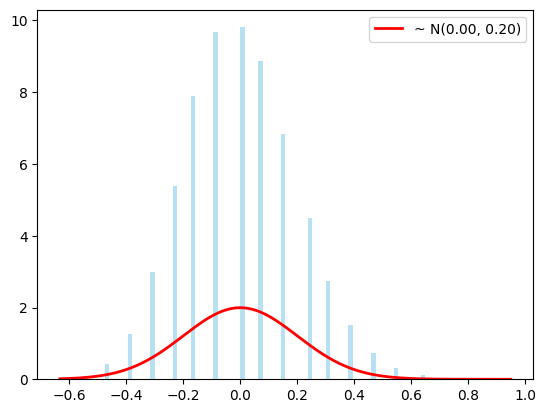

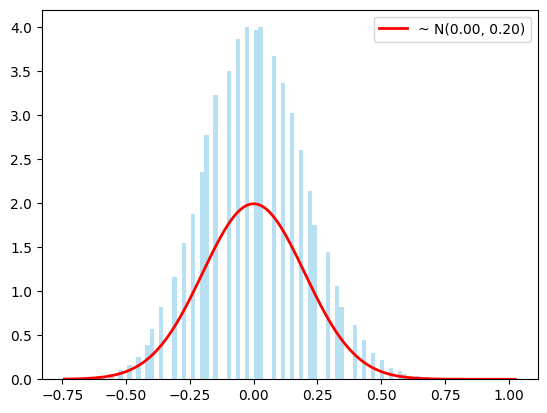

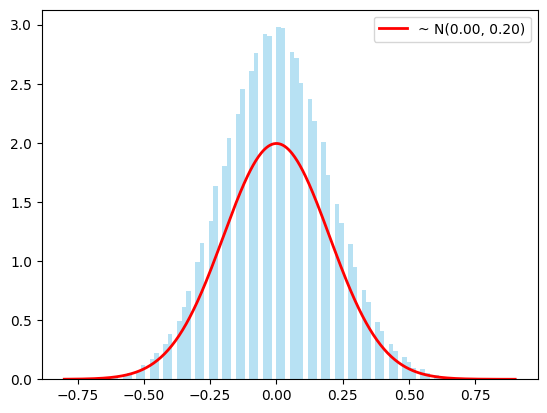

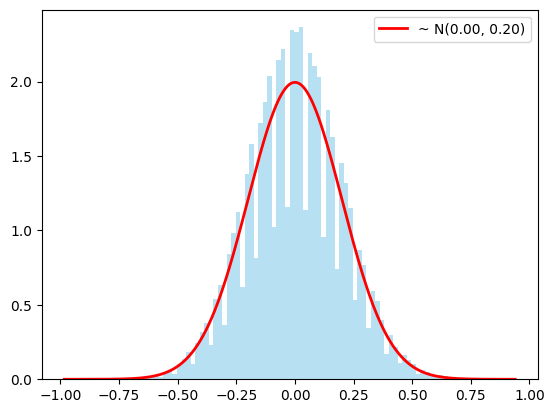

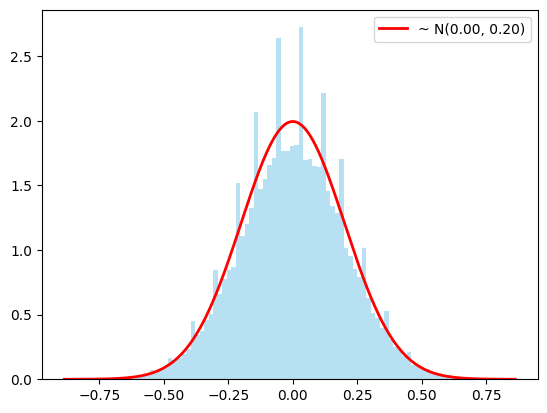

In [42]:
import math

from matplotlib import pyplot as plt
import numpy as np
import drawer
import scipy

sizes: list[int] = [5, 10, 50, 100, 500, 1000]
M: int = 100000
m: int = 4
theta: float = 0.2
for size in sizes:
    samples = []
    assessment = []
    hist = []
    for i in range(M):
        e = np.random.binomial(m, theta, size=size)
        samples.append(e)
        theta_ = sum(e) / (m * size)
        assessment.append(theta)
        hist.append((theta_ - theta) * math.sqrt(size))
    
    arr = np.array(assessment)
    # mean = np.mean(arr)
    # var = np.var(arr)
    drawer.draw_hist_and_ndf(hist, 0, math.sqrt(theta * (1 - theta) / m), "", "")
    plt.show()


## С помощью метода максимального правдоподобия найдем оценку параметра $\theta$
Заменим на логарифмическую функцию правдоподобия

$L(X | \theta) = \sum_{i=1}^n ln (C_m^{x_i} * \theta^{x_i} * (1 - \theta)^{(m - x_i)})$

$L(X | \theta) = \sum_{i=1}^n (ln C_m^{x_i} + x_i ln \theta + (m - x_i) ln (1-\theta))$

$L' = \sum_{i=1}^n (\frac{x_i}{\theta} - \frac {m - x_i}{1 - \theta}) = \sum_{i=1}^n \frac{x_i - x_i \theta - \theta m + \theta x_i}{\theta (1 - \theta)} = \sum_{i=1}^n \frac{x_i - \theta m}{\theta (1 - \theta)} = 0$

$\frac {\sum_{i=1}^n x_i - n m \theta}{\theta (1 - \theta)} = 0$

$\theta = \frac {\sum_{i=1}^n x_i} {n m} = \frac {\overline{X}} {m}$

## Свойства оценки
* Несмещенность - следует из асимптотической нормальности.
* Состоятельность - следует из асиптотической нормальности.
* Асимптотическая нормальность - так как выборочное среднее асимптотически нормально, а m - фиксированно, то соответсвенно оценка тоже асимптотически нормальна.